In [ ]:
!pip install osmnx

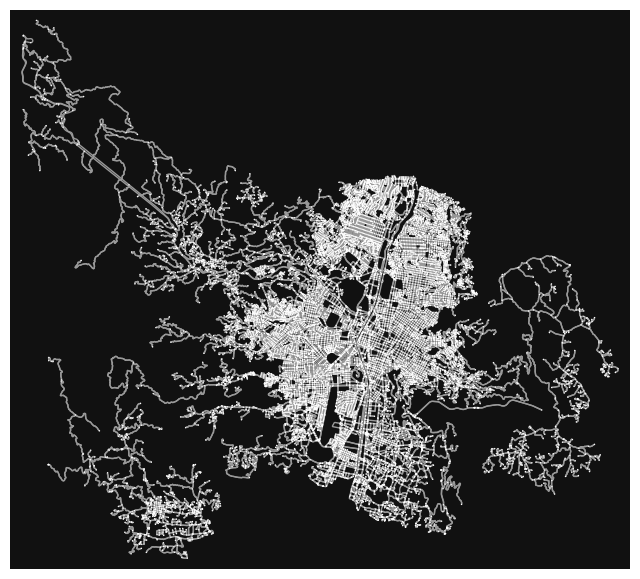

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
place_name = "Medellin, Colombia"
G = ox.graph_from_place(place_name, network_type='drive', simplify=True)
ox.plot_graph(G, node_size = 1, node_color = "white")


In [ ]:
!pip install geopandas contextily matplotlib pyproj

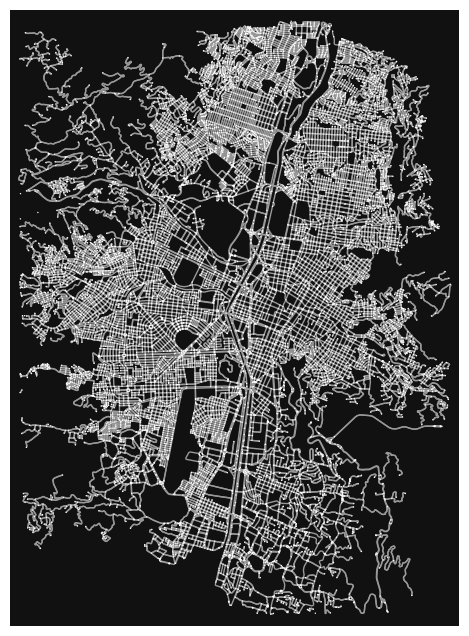

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
#Filtramos un poco la región para poderla hacer un poco más manejable
import numpy as np
north = 6.312
south = 6.182
east  = -75.531
west  = -75.626
nodos=[n for n in G.nodes if G.nodes[n]['x']>=west and G.nodes[n]['x']<=east and G.nodes[n]['y']>=south and G.nodes[n]['y']<=north]
G2=G.subgraph(nodos)
ox.plot_graph(G2, node_size = 1, node_color = "white")

In [ ]:
G2.nodes[9681736014], G.edges[(11566363168, 11566363167, 0)]

({'y': 6.3038018, 'x': -75.5512469, 'street_count': 4},
 {'osmid': 1244269665,
  'highway': 'residential',
  'oneway': False,
  'reversed': False,
  'length': np.float64(72.83592202665936)})

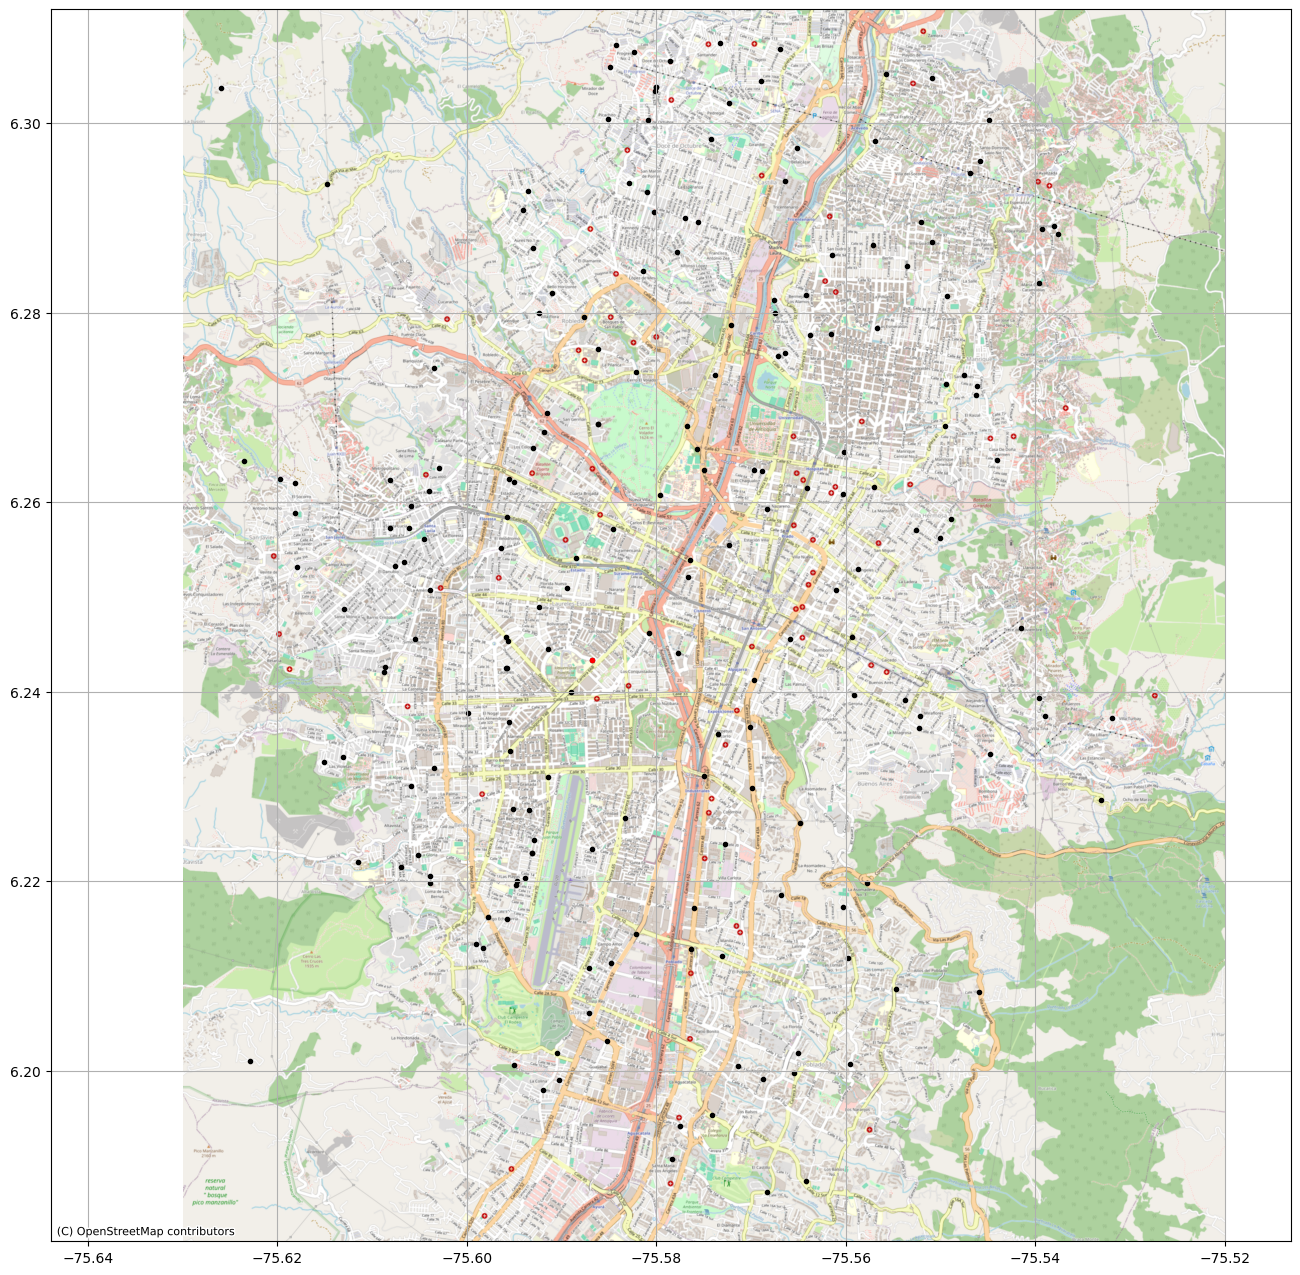

In [ ]:
#Parámetros del problema
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as cx
cap=20 #Número de niños por bus
N=200 #Número de niños
ni=list(np.random.choice(G2.nodes, size=N)) #Nodos donde los niños se ubican
r_origen=(-75.58683269546758, 6.243283526198216)
xi=[G2.nodes[n]['x'] for n in ni]
yi=[G2.nodes[n]['y'] for n in ni]

x=[G2.nodes[n]['x'] for n in G2.nodes]
y=[G2.nodes[n]['y'] for n in G2.nodes]
n=list(G2.nodes)
dist=[(xj-r_origen[0])**2+(yj-r_origen[1])**2 for xj,yj in zip(x,y)]
origen=n[np.argmin(dist)]
ni.append(origen)
xi.append(r_origen[0])
yi.append(r_origen[1])

import geopandas as gpd
import contextily as ctx

latMin=south
latMax=north
lonMin=west
lonMax=east
plt.figure(figsize=(16,16))
ax=plt.subplot(1,1,1)
ax.scatter(xi,yi,marker='.', color='k')
ax.scatter(xi[-1],yi[-1],marker='.', color='r')

plt.axis('equal')
plt.xlim(lonMin, lonMax)
plt.ylim(latMin, latMax)

plt.grid()
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=15, crs='EPSG:4326')

In [ ]:
#Cálculo de las matrices de origen destino y distancias entre todos los puntos
from tqdm import tqdm
dist={}
ruta={}
for i in tqdm(range(len(ni))):
  distancias = nx.single_source_dijkstra_path_length(G2,source=ni[i], weight="length")
  for j in range(len(ni)):
    dist[(i,j)]=float(distancias[ni[j]])

100%|██████████| 201/201 [01:32<00:00,  2.17it/s]


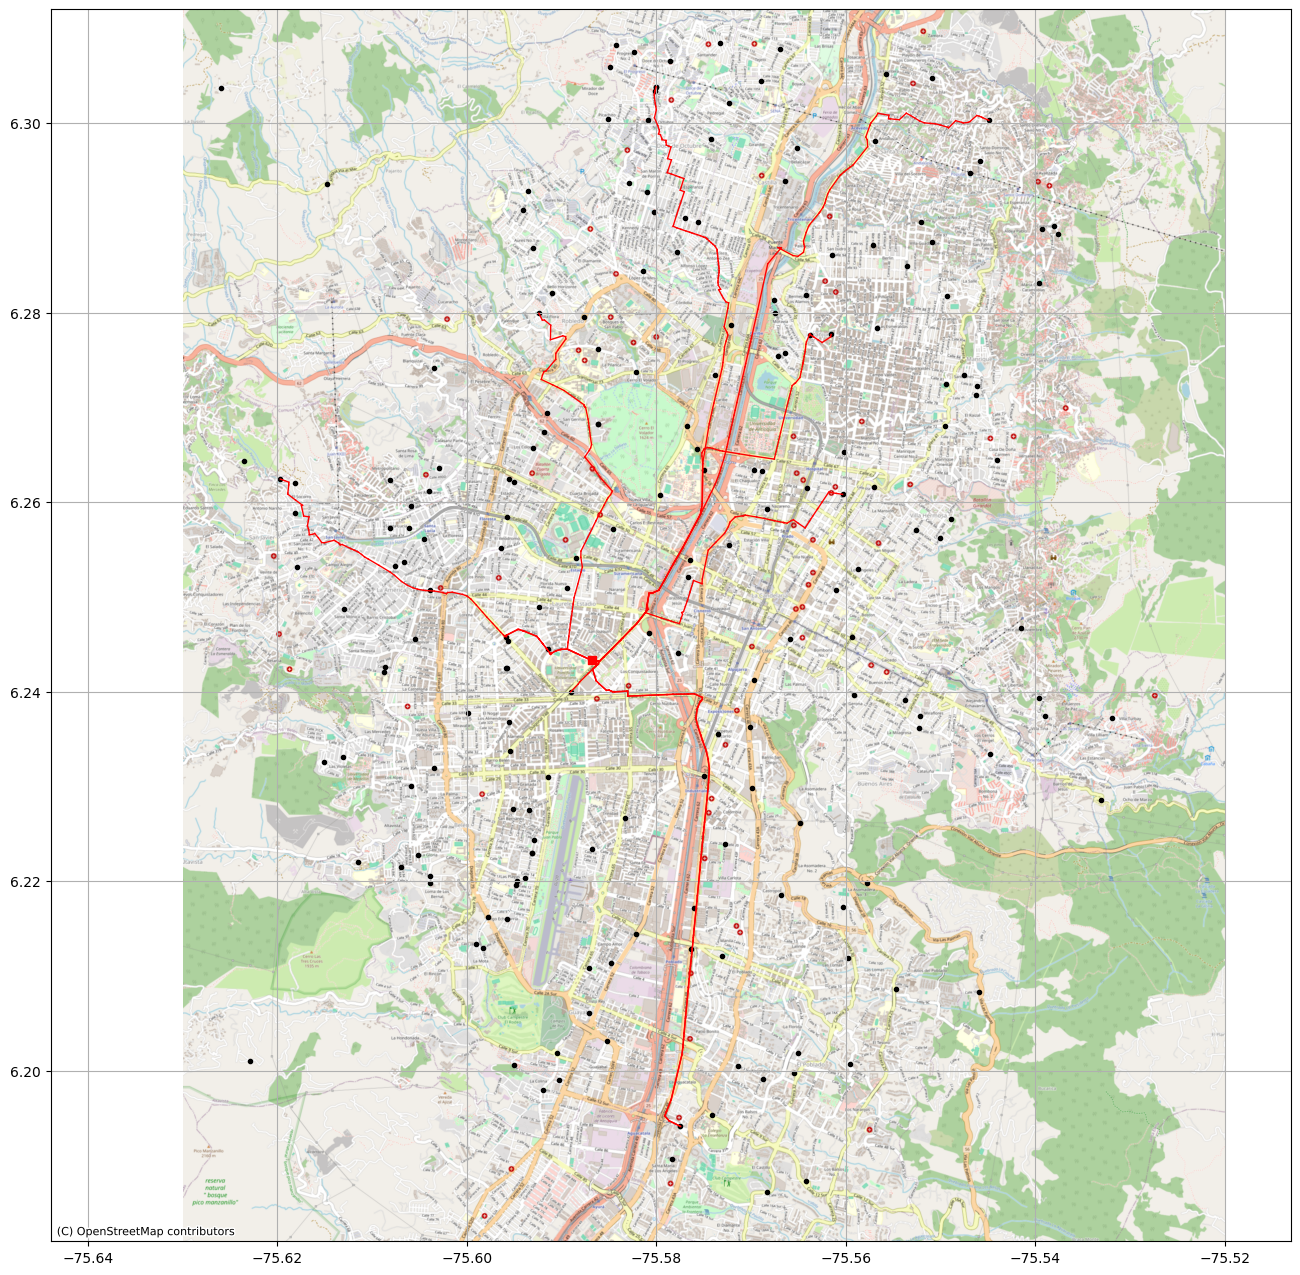

In [ ]:
#Resumen de información:
#Nodos de niños: ni: códigos de los nodos en networkx, xi, yi: posiciones
#Nodo de origen, destino: ni[-1], xi[-1], yi[-1]
#Grafo: G2, nodos: G2.nodes, G2.edges
#Proceso de enrutamiento:
plt.figure(figsize=(16,16))
ax=plt.subplot(1,1,1)
ax.scatter(xi,yi,marker='.', color='k')
ax.scatter(xi[-1],yi[-1],marker='s', color='r')
for k in range(10):
  src=np.random.choice(ni, size=1)[0]
  dst=ni[-1]
  path=nx.shortest_path(G2, src, dst, weight='length')

  for i in range(len(path)-1):
    plt.plot([G2.nodes[path[i]]['x'], G2.nodes[path[i+1]]['x']], [G2.nodes[path[i]]['y'], G2.nodes[path[i+1]]['y']], '-r', linewidth=1)
plt.axis('equal')
plt.xlim(lonMin, lonMax)
plt.ylim(latMin, latMax)

plt.grid()
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=15, crs='EPSG:4326')